In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
def sig_grad(x):
    return x * (1 - x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [90]:
# train the neuron
lr = 0.15 # learning rate
bias_ini = 0.9 # initial bias, could be chosen randomly too
weight_ini = 0.6 # initial weight, could be chosen randomly too
bias = 0
weight = 0
pred = 0     # desired output
input = 1    # input we feed the neuron
z = input * weight_ini + bias_ini
output = 0

for epochs in range(300):
    z = input * weight + bias
    output = sigmoid(z)
    bias -= lr * sig_grad(sigmoid(z)) * sigmoid(z)
    weight -= lr * sig_grad(sigmoid(z)) * sigmoid(z)


In [91]:
def crossEntropy(x, y, z):
    return x * (sigmoid(z) - y)

def meanSquaredError(x, y, z):
    return sig_grad(sigmoid(z - y)) * sigmoid(z - y)

def L2Error(x, y, z):
    return - 2 * (y - sigmoid(z)) * (sig_grad(sigmoid(z)))

def L1Error(x, y, z):
    return  sig_grad(sigmoid(z))

def focalLoss(x, y, z):
    alpha = -1
    gamma = 1
    z = sigmoid(x)
    return alpha * gamma * (y - z) ** gamma * (np.log(z) / (y - z) + 1 / z)

In [92]:
# train the neuron
n_epochs = 300

# plot data acc
progress = np.zeros((n_epochs))
def train(lr, bias, weight, x, y, loss_function):

    # compute the weighted sum z
    z = weight * x + bias
    for epoch in range(n_epochs):
        z = input * weight + bias
        progress[epoch] = sigmoid(z)
        bias -= lr * loss_function(x, y, z)
        weight -= lr * loss_function(x, y, z)
    return progress



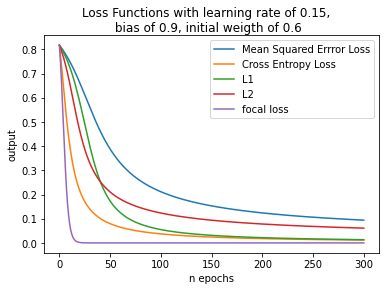

In [93]:
fig, ax = plt.subplots()
fig.suptitle('Loss Functions with learning rate of {0},\n bias of {1}, initial weigth of {2}'.format(lr, bias_ini, weight_ini))
ax.plot(np.linspace(0, n_epochs, n_epochs), train(lr, bias_ini, weight_ini, input, pred, meanSquaredError), label='Mean Squared Errror Loss')
ax.plot(np.linspace(0, n_epochs, n_epochs), train(lr, bias_ini, weight_ini, input, pred, crossEntropy), label='Cross Entropy Loss')
ax.plot(np.linspace(0, n_epochs, n_epochs), train(lr, bias_ini, weight_ini, input, pred, L1Error), label='L1')
ax.plot(np.linspace(0, n_epochs, n_epochs), train(lr, bias_ini, weight_ini, input, pred, L2Error), label='L2')
ax.plot(np.linspace(0, n_epochs, n_epochs), train(lr, bias_ini, weight_ini, input, pred, focalLoss), label='focal loss')
ax.set_xlabel(r'n epochs')
ax.set_ylabel(r'output')
plt.legend()
fig.savefig('single_neuron_mls_300e.png')
plt.show()

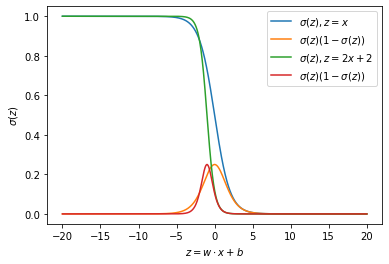

In [94]:
fig, ax = plt.subplots()
x = np.linspace(-20, 20, 1000)
ax.plot(x, 1 / (1 + np.exp(x)), label=r'$\sigma(z), z = x$')
ax.plot(x, (1 / (1 + np.exp(x)) * (1 - 1 / (1 + np.exp(x)))), label=r'$\sigma(z)(1-\sigma(z))$')
x_ = 2 * x + 2
ax.plot(x, 1 / (1 + np.exp(x_)), label=r'$\sigma(z), z = 2x + 2$')
ax.plot(x, (1 / (1 + np.exp(x_)) * (1 - 1 / (1 + np.exp(x_)))), label=r'$\sigma(z)(1-\sigma(z))$')
ax.set_xlabel(r'$z = w\cdot x + b$')
ax.set_ylabel(r'$\sigma(z)$')
plt.legend()
plt.show()
fig.savefig('sigmoid_deriv.png')

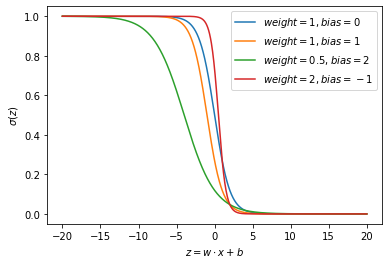

In [95]:
fig, ax = plt.subplots()
x = np.linspace(-20, 20, 1000)
ax.plot(x, 1 / (1 + np.exp(x)), label=r'$weight = 1, bias = 0$')
ax.plot(x, 1 / (1 + np.exp(x + 1)), label=r'$weight = 1, bias = 1$')
ax.plot(x, 1 / (1 + np.exp(0.5 * x + 2)), label=r'$weight = 0.5, bias = 2$')
ax.plot(x, 1 / (1 + np.exp(2 * x - 1)), label=r'$weight = 2, bias = -1$')
ax.set_xlabel(r'$z = w\cdot x + b$')
ax.set_ylabel(r'$\sigma(z)$')
plt.legend()
fig.savefig('sigmoid.png')
plt.show()